In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Read datasets from CSV files
data1 = pd.read_csv('../data/clean_airbnb_data_gb.csv')
data2 = pd.read_csv('../data/clean_airbnb_data_rf.csv')


In [3]:

# 1. Basic Statistical Comparison
print("Basic Statistics Comparison:")
print("Dataset 1 Summary Statistics:")
print(data1.describe())
print("\nDataset 2 Summary Statistics:")
print(data2.describe())

Basic Statistics Comparison:
Dataset 1 Summary Statistics:
                  0             1             2             3             4  \
count  1.856100e+04  1.856100e+04  1.856100e+04  1.856100e+04  1.856100e+04   
mean  -1.456611e-16 -2.005950e-16  1.253719e-16 -1.041257e-16 -1.140788e-16   
std    1.000027e+00  1.000027e+00  1.000027e+00  1.000027e+00  1.000027e+00   
min   -2.221390e+00 -5.968284e-01 -1.377585e+00 -1.125581e+00 -7.895464e-01   
25%   -3.975025e-01 -5.968284e-01 -6.683950e-01 -6.809672e-01 -6.450572e-01   
50%   -3.975025e-01 -5.968284e-01 -6.683950e-01 -2.363532e-01 -3.560786e-01   
75%   -3.975025e-01  6.515607e-01  4.079533e-02  2.082608e-01  2.379328e-01   
max    1.236971e+01  1.063867e+01  1.280622e+01  5.543629e+00  1.682209e+01   

                  5             6             7             8             9  \
count  1.856100e+04  1.856100e+04  1.856100e+04  1.856100e+04  1.856100e+04   
mean  -9.857484e-17  5.240736e-16  5.282846e-16 -5.359409e-17 -1.008717

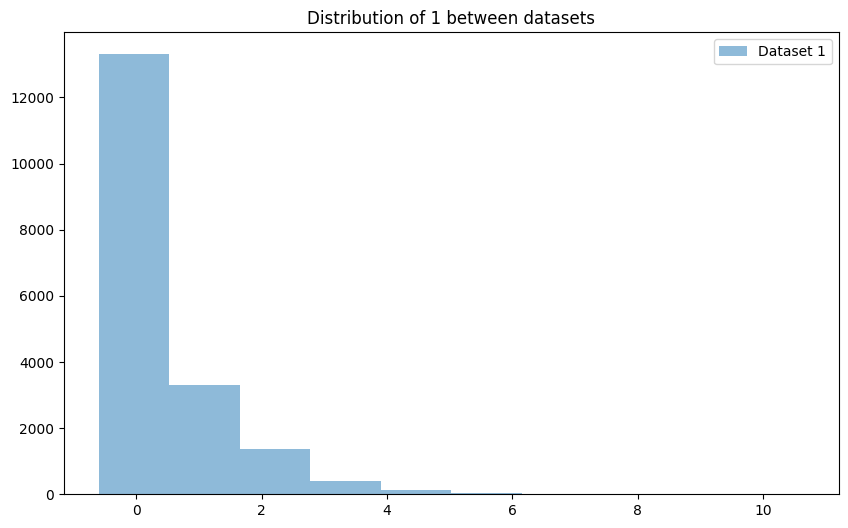

In [6]:
# 2. Distribution Comparison (for a single feature/column)
feature_to_compare = '1'
plt.figure(figsize=(10, 6))
plt.hist(data1[feature_to_compare], alpha=0.5, label='Dataset 1')
plt.hist(data2[feature_to_compare], alpha=0.5, label='Dataset 2')
plt.title(f'Distribution of {feature_to_compare} between datasets')
plt.legend()
plt.show()

In [7]:

# 3. Feature Correlation
correlation_data1 = data1.corr()
correlation_data2 = data2.corr()
print("\nFeature Correlation in Dataset 1:")
print(correlation_data1)
print("\nFeature Correlation in Dataset 2:")
print(correlation_data2)



Feature Correlation in Dataset 1:
               0         1         2         3         4         5         6  \
0       1.000000  0.571708  0.487762  0.492776 -0.100345  0.417872 -0.094287   
1       0.571708  1.000000  0.748513  0.793264 -0.118963  0.605154 -0.125521   
2       0.487762  0.748513  1.000000  0.848706 -0.082921  0.471127 -0.122572   
3       0.492776  0.793264  0.848706  1.000000 -0.078136  0.543779 -0.129683   
4      -0.100345 -0.118963 -0.082921 -0.078136  1.000000 -0.104591  0.042363   
...          ...       ...       ...       ...       ...       ...       ...   
134     0.004045 -0.004162  0.001080 -0.000956  0.000338  0.002467 -0.012835   
135     0.005499  0.002984  0.005050  0.003047 -0.002731 -0.003148 -0.016436   
136    -0.009488 -0.011786 -0.003287 -0.007577 -0.000448 -0.006471  0.027302   
137    -0.007875  0.007506  0.009318  0.014690 -0.000469 -0.002696  0.001460   
Rating -0.008457  0.026680 -0.021474 -0.008658 -0.002555  0.105120 -0.055454   

    

In [8]:
# 4. Train Models
# Assuming a classification problem and RandomForestClassifier as the model
X1 = data1.drop('target_column', axis=1)  # Assuming a 'target_column' exists
y1 = data1['target_column']
X2 = data2.drop('target_column', axis=1)
y2 = data2['target_column']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model1 = RandomForestClassifier()
model1.fit(X_train1, y_train1)
predictions1 = model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, predictions1)

model2 = RandomForestClassifier()
model2.fit(X_train2, y_train2)
predictions2 = model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, predictions2)

print("\nModel Performance Metrics:")
print(f"Accuracy of Model 1: {accuracy1}")
print(f"Accuracy of Model 2: {accuracy2}")

KeyError: "['target_column'] not found in axis"

In [ ]:

# Additional comparison using classification report
print("\nClassification Report for Model 1:")
print(classification_report(y_test1, predictions1))

print("\nClassification Report for Model 2:")
print(classification_report(y_test2, predictions2))